# Note before running 

# Import libraries 


In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization
from keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import collections
import pandas as pd
from collections import Counter
from keras.applications.vgg16 import VGG16
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

## Read images in train/valid/test for VGG format

In [2]:
train_path= 'train'
valid_path = 'valid'
test_path = 'test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10,shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['health','one','two','unused'],batch_size=10)
imgs, labels = next(train_batches)

Found 4123 images belonging to 4 classes.
Found 833 images belonging to 4 classes.
Found 918 images belonging to 4 classes.


# Helper functions 

In [3]:
# PLOT IMAGES 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
# PLOT CONFUSION MATRIX
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

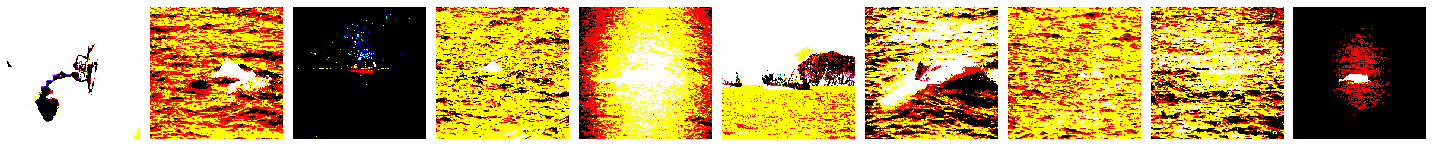

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [5]:
# check if data is loaded 
plotImages(imgs)
print(labels)

# Load Trained models 

### load pretrained model 1

In [6]:
# model_1 = keras.models.load_model('model_name')
model_1 = keras.models.load_model('results/mark5_180each_dropout.h5')
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Plot confusion matrix

Confusion matrix, without normalization
[[355  15  81   6]
 [  5  44  40   0]
 [ 39  46 154   0]
 [  8   2   5  33]]


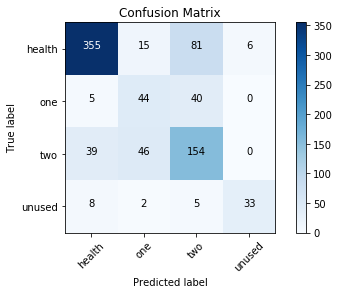

In [7]:
predictions = model_1.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [8]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_1.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))

0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       457
           1       0.41      0.49      0.45        89
           2       0.55      0.64      0.59       239
           3       0.85      0.69      0.76        48

    accuracy                           0.70       833
   macro avg       0.67      0.65      0.66       833
weighted avg       0.73      0.70      0.71       833



### 2 - VGG 16 model with transfer learning 

In [9]:
# model_2 = keras.models.load_model('model_name')
model_2 = keras.models.load_model('results/vgg_dropout_16.h5')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Confusion matrix, without normalization
[[417   4  12  24]
 [ 13  45  31   0]
 [ 76  27 135   1]
 [  0   0   0  48]]


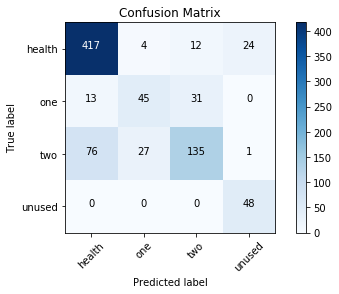

In [10]:
### Plot confusion matrix

predictions = model_2.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')



In [11]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_2.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       457
           1       0.59      0.51      0.55        89
           2       0.76      0.56      0.65       239
           3       0.66      1.00      0.79        48

    accuracy                           0.77       833
   macro avg       0.71      0.75      0.71       833
weighted avg       0.77      0.77      0.76       833



### load pretrained model 3

In [12]:
model_3 = keras.models.load_model('results/mark_2_all_regularization_point01.h5')
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Confusion matrix, without normalization
[[405   1  37  14]
 [ 13  26  50   0]
 [ 37   8 193   1]
 [  0   0   0  48]]


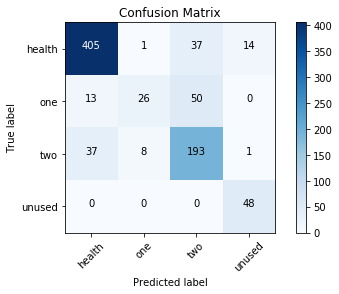

In [13]:
### Plot confusion matrix

predictions = model_3.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [14]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_3.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       457
           1       0.74      0.29      0.42        89
           2       0.69      0.81      0.74       239
           3       0.76      1.00      0.86        48

    accuracy                           0.81       833
   macro avg       0.77      0.75      0.73       833
weighted avg       0.81      0.81      0.80       833



### load pretrained model 4

In [15]:
model_4 = keras.models.load_model('results/mark_3_all_regularization_point1.h5')
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Confusion matrix, without normalization
[[424   2  14  17]
 [ 11  43  35   0]
 [ 57  24 157   1]
 [  0   0   0  48]]


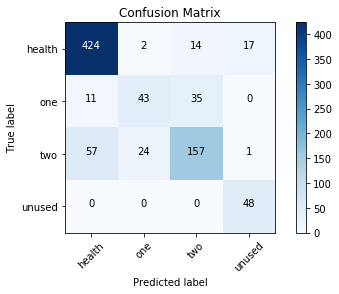

In [16]:
### Plot confusion matrix

predictions = model_4.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [17]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_4.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       457
           1       0.62      0.48      0.54        89
           2       0.76      0.66      0.71       239
           3       0.73      1.00      0.84        48

    accuracy                           0.81       833
   macro avg       0.74      0.77      0.75       833
weighted avg       0.80      0.81      0.80       833



### load pretrained model 5

In [18]:
model_5 = keras.models.load_model('results/mark_4_all_regularization_one_augmentation_point1.h5')
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Confusion matrix, without normalization
[[440   1   9   7]
 [ 21  23  45   0]
 [ 78   8 153   0]
 [  0   0   0  48]]


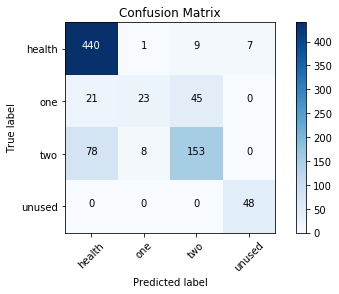

In [19]:
### Plot confusion matrix

predictions = model_5.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [20]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_5.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       457
           1       0.72      0.26      0.38        89
           2       0.74      0.64      0.69       239
           3       0.87      1.00      0.93        48

    accuracy                           0.80       833
   macro avg       0.79      0.72      0.72       833
weighted avg       0.79      0.80      0.78       833



# pretrained model 6

In [21]:
model_6 = keras.models.load_model('results/mark_6_all_regularization_one_unused_augmentation_health_undersampled_point1.h5')
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Confusion matrix, without normalization
[[415   0  27  15]
 [ 18  11  60   0]
 [ 91   3 145   0]
 [  0   0   0  48]]


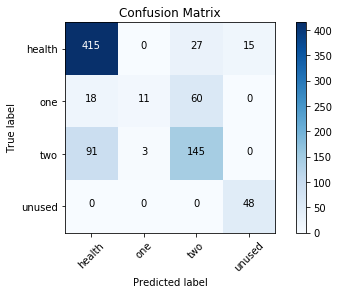

In [22]:
### Plot confusion matrix

predictions = model_6.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [23]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_6.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       457
           1       0.79      0.12      0.21        89
           2       0.62      0.61      0.62       239
           3       0.76      1.00      0.86        48

    accuracy                           0.74       833
   macro avg       0.74      0.66      0.64       833
weighted avg       0.74      0.74      0.71       833



# model-7


In [24]:
model_7 = keras.models.load_model('results/mark_7_all_regularization_one_unused_augmentation_point1.h5')
model_7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

Confusion matrix, without normalization
[[441   0   5  11]
 [ 13  21  55   0]
 [ 65   5 169   0]
 [  0   0   0  48]]


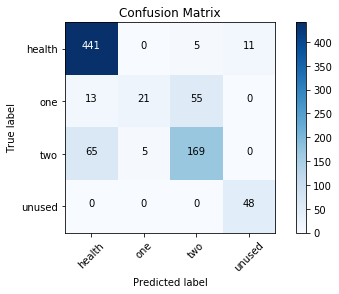

In [25]:
### Plot confusion matrix

predictions = model_7.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot=['health','one','two','unused']
plot_confusion_matrix(cm=cm, classes=cm_plot, title='Confusion Matrix')

In [26]:
print('0: Health , 1: One , 2: Two , 3: Unused')
predictions = model_7.predict(x=test_batches, verbose=0)
ytest= test_batches.classes
ypredict = np.argmax(predictions,axis=-1)
print(classification_report(ytest,ypredict))


0: Health , 1: One , 2: Two , 3: Unused
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       457
           1       0.81      0.24      0.37        89
           2       0.74      0.71      0.72       239
           3       0.81      1.00      0.90        48

    accuracy                           0.82       833
   macro avg       0.80      0.73      0.72       833
weighted avg       0.81      0.82      0.79       833

